In [1]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import random

In [2]:
N_samples = 1000
N_terms = int(N_samples/20)
#N_terms = 50
t_low = -np.pi
t_high = 2.0*np.pi

In [3]:
# Calculate the spacing (in time) between data points
T = t_high - t_low
dt = T/N_samples

# Set up arrays to hold the time (x-axis), amplitude (y-axis), and frequencies (Fourier transform)
t = np.zeros(N_samples)
y = np.zeros(N_samples)
f = np.zeros(N_terms)

yhigh = np.zeros(1000)
ylow = np.zeros(1000)
time = np.zeros(1000)

ytReal = np.zeros(N_terms)
ytImag = np.zeros(N_terms)

yfftReal = np.zeros(N_terms)
yfftImag = np.zeros(N_terms)

power = np.zeros(N_terms)
powerfft = np.zeros(N_terms)

## Theory

The function that we will choose is:

$y(t) = sin(2 \pi f_s t)$

The Fourier approximation is given by:

$y(t) \approx \frac{a_0}{2} + \sum_{n=1}^{\infty} \left ( a_n cos(\frac{2 \pi n t}{T}) + b_n sin(\frac{2 \pi n t}{T}) \right )$

where $T$ is the time-span.

For the chosen function, we expect:

$a_0 = 0$

$a_n = 0,~for~all~n$

Since we have a single sine wave with with frequency, $f_s$, we would expect one of the $b_n$ values to be non-zero, and the rest zero.  The value of n for the single non-zero $b_n$ value can be calculated from:

$2 \pi f_s = \frac{2 \pi n}{T}$

$n = T\cdot f_s = (0.2)(10.0) = 2$

Thus, we expect:

$b_2 = 1, and~all~other~b_n=0$

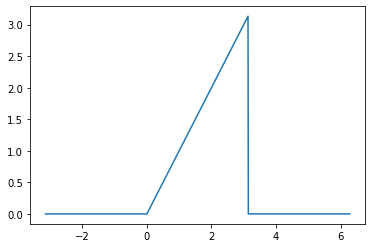

In [4]:
# Create the data set.  Add a little bit of random noise into the signal.

t = np.linspace(t_low,t_high,N_samples)
y = np.zeros(N_samples)

for i in range(N_samples):
    if t[i] < 0.0:
        y[i] = 0.0 + 0.0000*random.uniform(-1,1)
    if t[i] >= 0.0 and t[i] < np.pi:
        y[i] = t[i] + 0.0000*random.uniform(-1,1)
    if t[i] > np.pi:
        y[i] = 0.0 + 0.0000*random.uniform(-1,1)
    
plt.plot(t,y)
    
for i in range(N_terms):
    f[i] = i/(N_terms*dt)
      
#print (y,f,t)

# Calculating the coefficients

We will determine the coefficients by numerical integration, according to:

$a_0 = \frac{2}{T} \int_0^T f(t) dt$

$a_n = \frac{2}{T} \int_0^T f(t) cos(\frac{2 \pi n}{T} t) dt$

$b_n = \frac{2}{T} \int_0^T f(t) sin(\frac{2 \pi n}{T} t) dt$

In [5]:
# Define a useful constant, because I am sick of typing it so many times!

twopiT=2.0*np.pi/T

# rather than just making things exactly zero, make them a small number, so that logarithmic plots do not fail.
epsilon = 0.000001

for n in range(N_terms):
    ytReal[n]=epsilon
    ytImag[n]=epsilon
    for i in range(N_samples):
        ytReal[n] = ytReal[n] + 2.0/T*y[i]*np.cos(twopiT*n*i*dt)*dt
        ytImag[n] = ytImag[n] + 2.0/T*y[i]*np.sin(twopiT*n*i*dt)*dt  
    power[n]=(ytReal[n]**2+ytImag[n]**2)
    
ymaxr = max(ytReal)
ymaxi = max(ytImag)
ymax = 1.2*max(ymaxr,ymaxi)

In [6]:
integral = 0.0
N_real = int(N_terms)

for n in range(N_real):
    integral = integral + power[n]
print("Average Power = %.5f Watts." % (integral/2.0))

#Nyquist frequency is 1/2 the sampling rate frequency
f_nyquist = 0.5*(1.0/dt)
print("Nyquist frequency = %.3f Hz." % f_nyquist)

Average Power = 1.35257 Watts.
Nyquist frequency = 53.052 Hz.


In [7]:
N_fft = len(y)
yfft = fft(y)
yfftReal = 2.0/N_fft*yfft.real
yfftImag = 2.0/N_fft*yfft.imag
powerfft = 4.0/N_fft**2*abs(yfft)**2

for i in range(N_terms):
    print (ytReal[i],yfftReal[i],ytImag[i],yfftImag[i],power[i],powerfft[i])
    

1.0430097609918112 1.043008760991811 1e-06 -0.0 1.0878693615251953 1.0878672755056726
-0.8649365034156199 -0.8649375034156197 -0.3209822088508936 0.32098320885089393 0.8511447333396374 0.8511471051790616
0.4379370168624716 0.4379360168624715 0.4508313897230097 -0.45083038972300976 0.395037772697981 0.3950359951631678
-0.007332045323955886 -0.007333045323955581 -0.33359032998402927 0.33359132998402946 0.11133626714748608 0.11133694899423682
-0.21340182809568564 -0.2134028280956857 0.07968622743950209 -0.07968522743950184 0.05189023507812063 0.05189050251132191
0.17728311697191074 0.1772821169719105 0.12680193791629782 -0.12680093791629818 0.047508035022604825 0.04750742685449505
-0.007330598588496925 -0.007331598588496897 -0.1666811721034086 0.16668217210340858 0.02783635080943179 0.02783669883497316
-0.12027013000083532 -0.12027113000083539 0.06086633047129886 -0.06086533047129825 0.01816961435545919 0.018169733165058193
0.11206962131140492 0.11206862131140481 0.06905024800230641 -0.06

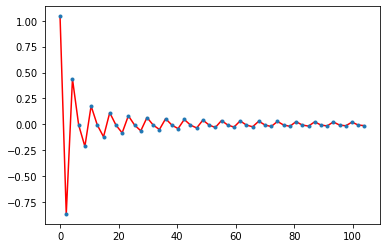

In [8]:
plt.plot(f,yfftReal[0:N_terms],'r-')
plt.plot(f,ytReal,'.')

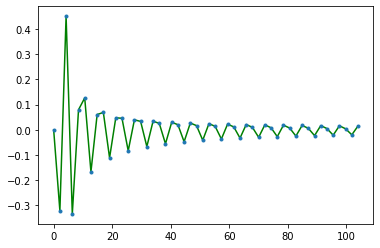

In [9]:
plt.plot(f,-yfftImag[0:N_terms],'g-')
plt.plot(f,ytImag,'.')

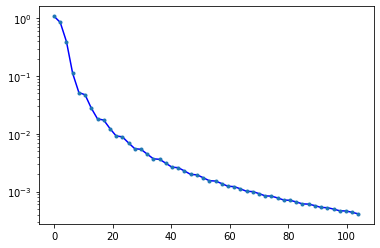

In [10]:
plt.plot(f,powerfft[0:N_terms],'b-')
plt.plot(f,power,'.')
plt.yscale("log")

In [11]:
yfft_time = np.zeros(N_samples)
yfft_ejb = np.zeros(N_samples)

for n in range(N_terms):
    for i in range(N_samples):
        if n==0:
            yfft_ejb[i] = ytReal[n]/2.0
            yfft_time[i] = yfftReal[n]/2.0
        else:
            yfft_ejb[i] = yfft_ejb[i] + ytReal[n]*np.cos(twopiT*n*i*dt) + ytImag[n]*np.sin(twopiT*n*i*dt)
            yfft_time[i] =  yfft_time[i] + yfftReal[n]*np.cos(twopiT*n*i*dt) - yfftImag[n]*np.sin(twopiT*n*i*dt)

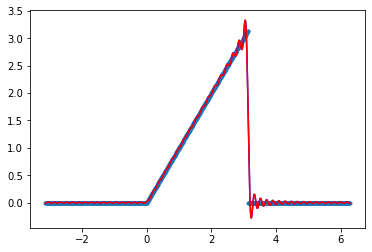

In [12]:
plt.plot(t,y,'.')
plt.plot(t,yfft_time,'b-')
plt.plot(t,yfft_ejb,'r-')

(-1.2, 1.2)

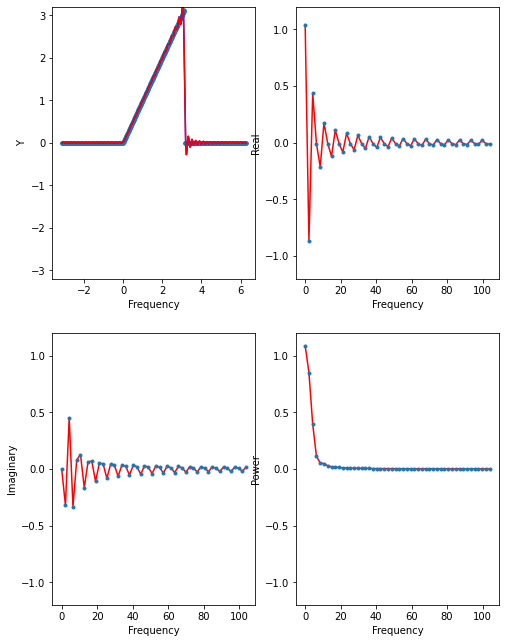

In [14]:
fig2, axs2 = plt.subplots(nrows=2, ncols=2, figsize=(8,11))

axs2[0,0].plot(t,y,'.')
axs2[0,0].plot(t,yfft_time,'b-')
axs2[0,0].plot(t,yfft_ejb,'r-')
axs2[0,0].set_ylabel('Y')
axs2[0,0].set_xlabel('Frequency')
axs2[0,0].set_ylim(-3.2,3.2)

axs2[0,1].plot(f,yfftReal[0:N_terms],'r-')
axs2[0,1].plot(f,ytReal,'.')
axs2[0,1].set_ylabel('Real')
axs2[0,1].set_xlabel('Frequency')
axs2[0,1].set_ylim(-1.2,1.2)

axs2[1,0].plot(f,-yfftImag[0:N_terms],'r-')
axs2[1,0].plot(f,ytImag,'.')
axs2[1,0].set_ylabel('Imaginary')
axs2[1,0].set_xlabel('Frequency')
axs2[1,0].set_ylim(-1.2,1.2)

axs2[1,1].plot(f,powerfft[0:N_terms],'r-')
axs2[1,1].plot(f,power,'.')
axs2[1,1].set_ylabel('Power')
axs2[1,1].set_xlabel('Frequency')
axs2[1,1].set_ylim(-1.2,1.2)